# Credit Card Fraud Detection


<b>Names: </b> Poulomi Mukherjee & Jallepalli Prerna

<b>Date: </b> 21/09/2020

<b>Time: </b> 23:00:00


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

## Problem Statement

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.

It has been estimated by Nilson report that by 2020 the banking frauds would account to $30 billion worldwide. With the rise in digital payment channels, the number of fraudulent transactions is also increasing with new and different ways. 

In the banking industry, credit card fraud detection using machine learning is not just a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees, and denials of legitimate transactions. The objective of this project is to predict fraudulent credit card transactions with the help of machine learning models.

#### Data Preview:
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. <br>

This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. <br>

The data set has also been modified with Principal Component Analysis (PCA) to maintain confidentiality. <br>

Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. <br>

The feature 'class' represents class labelling, and it takes the value 1 in cases of fraud and 0 in others.


### The steps followed in this case study are:
1. Loading and understanding the data
2. Data visualization and EDA
3. Preparing the data for modeling

After this step, project is divided into 2 parts, one is without implementing techniques to balance the classes in the dataset and the other is applying models to the balanced dataset using three different techniques to balance, and finding out the best accurate model for the same.

4. Modeling with imbalanced dataset
5. Modeling with balanced dataset
6. Recommendations

#### For Modeling, three Classification Models were used:
- Logistic Regression
- Random Forest 
- XGBoost


### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the using of the library in this assignment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 500)

In [2]:
df = pd.read_csv('creditcard.csv') # reading the file
df.head() #checking if data from the csv file is loading properly

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

### To Install or Update Packages for running this assignment

!pip install imblearn

!pip install -U seaborn

!pip3 install xgboost

### Dataset Description

All the necessary information to be gathered about the dataset

In [ ]:
df.shape

In [4]:
df.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cols = df.columns.tolist()
cols

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [6]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [7]:
round(100*(df.isnull().sum())/len(df), 2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

The dataset available to predict credit card fraud detection contains 2,84,807 rows and 31 columns.

Since the data has been PCA transformed, the columns names are replaced by 28 principle components: 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27' and 'V28'. Additionally, there are 3 columns which retain their original structures: the Amount column which indicates the transactional amount, the Time column denotes the seconds between each transaction and the first transaction in the dataset, and the Class column indicates whether the transaction was fraudulent or not.

The data type of the Class variable is 'int' while the data type for the rest of the columns is 'float' since all the variables have been PCA transformed. There do not seem to be any missing value present in any of the columns.

## Data visualization and EDA

Text(0, 0.5, 'Frequency')

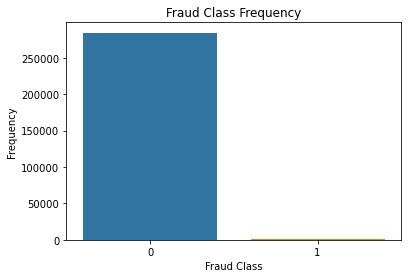

In [9]:
sns.countplot(x="Class", data = df)
plt.title("Fraud Class Frequency")
plt.xlabel("Fraud Class")
plt.ylabel("Frequency")

In [10]:
classes = df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


Text(0.5, 1.0, 'Class distribution in credit card dataset')

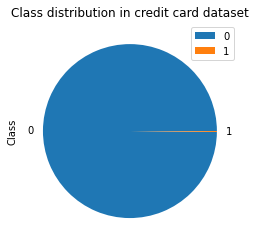

In [11]:
classes.plot(kind = 'pie',  legend = True)
plt.title("Class distribution in credit card dataset")

Here, we can clearly see that the classes of frauds in the dataset is highly imbalanced. While the number of normal transactions is more than 2,50,000, the number of frauds is very close to 0.

Furthermore, we can also see that the number of normal transactions is 99.827% while the number of fraud transactions is 0.173%.

##### Distribution of Time feature

Text(0, 0.5, 'Frequency')

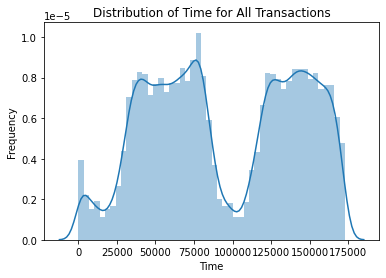

In [12]:
sns.distplot(df['Time'])
plt.title("Distribution of Time for All Transactions")
plt.xlabel("Time")
plt.ylabel("Frequency")

In [13]:
normal_df = df[df['Class'] == 0]
fraud_df = df[df['Class'] == 1]

Text(0, 0.5, 'Frequency')

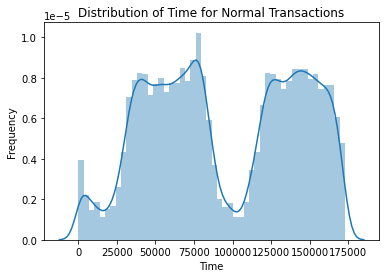

In [14]:
sns.distplot(normal_df['Time'])
plt.title("Distribution of Time for Normal Transactions")
plt.xlabel("Time")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

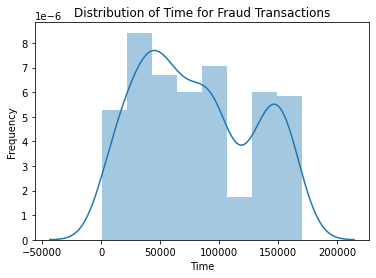

In [15]:
sns.distplot(fraud_df['Time'])
plt.title("Distribution of Time for Fraud Transactions")
plt.xlabel("Time")
plt.ylabel("Frequency")

The distribution of Time for the normal as well as fraud transactions has 2 peaks and does not contain any abnormality. Additionally, we can see that no inferences can be made using this column.

##### Distribution of Amount feature

Text(0, 0.5, 'Frequency')

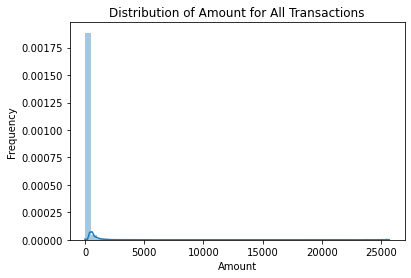

In [16]:
sns.distplot(df['Amount'])
plt.title("Distribution of Amount for All Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

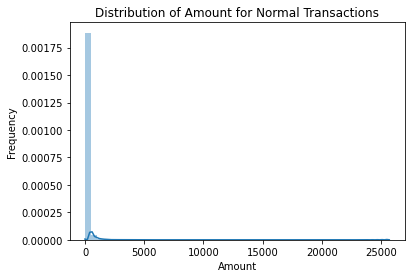

In [17]:
sns.distplot(normal_df['Amount'])
plt.title("Distribution of Amount for Normal Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

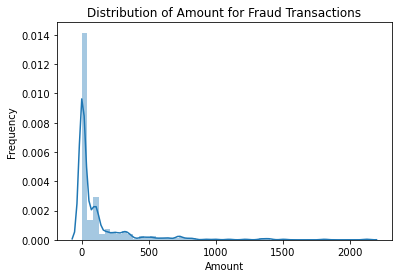

In [18]:
sns.distplot(fraud_df['Amount'])
plt.title("Distribution of Amount for Fraud Transactions")
plt.xlabel("Amount")
plt.ylabel("Frequency")

Here, we can see that the distribution of the Amount feature is highest close to 0 and then it flattens. For normal transaction, the highest value for the Amount variable is over 25,000 while the highest amount for fraud transactions is more than 2,000.

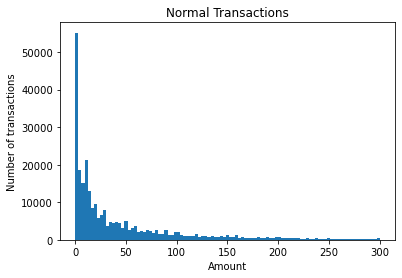

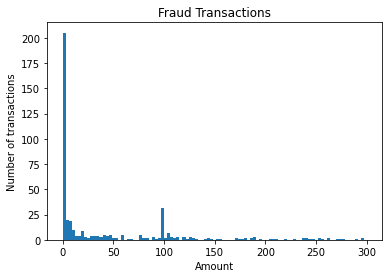

In [19]:
bins = np.linspace(0, 300, 100)
plt.hist(normal_df['Amount'], bins, label='genuine transactions')
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.title('Normal Transactions')
plt.show()

plt.hist(fraud_df['Amount'], bins, label='fraud transactions')
plt.xlabel('Amount')
plt.ylabel('Number of transactions')
plt.title('Fraud Transactions')
plt.show()

The number of normal transactions over Amount is significantly higher than the number of fraud transactions over Amount.

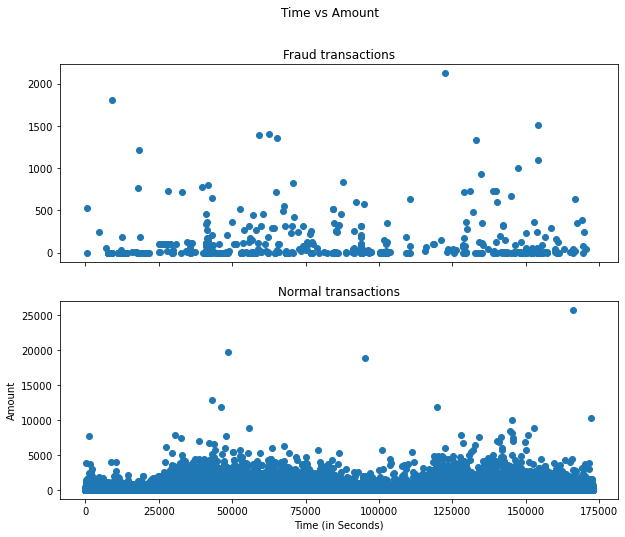

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,8))
f.suptitle('Time vs Amount')

ax1.scatter(fraud_df['Time'], fraud_df['Amount'])
ax1.set_title('Fraud transactions')

ax2.scatter(normal_df['Time'], normal_df['Amount'])
ax2.set_title('Normal transactions')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

## Dataset Preperation

Preparing the data fro modeling.

In [3]:
# dropping the column 'Time' since it will not be needed for this analysis as we cannot make any inferences from this column
data = df.drop('Time', axis=1)
data.head()

V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [4]:
data.shape

(284807, 30)

### Splitting the dataset into train and test sets

In [5]:
y = data['Class']
X = data.drop('Class', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

In [7]:
X_train.shape

(199364, 29)

In [8]:
X_test.shape

(85443, 29)

X_test and y_test should not be changed to evaluate on the test data after building the model

In [9]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
350
142


### Handling the skewness of variables in the dataset

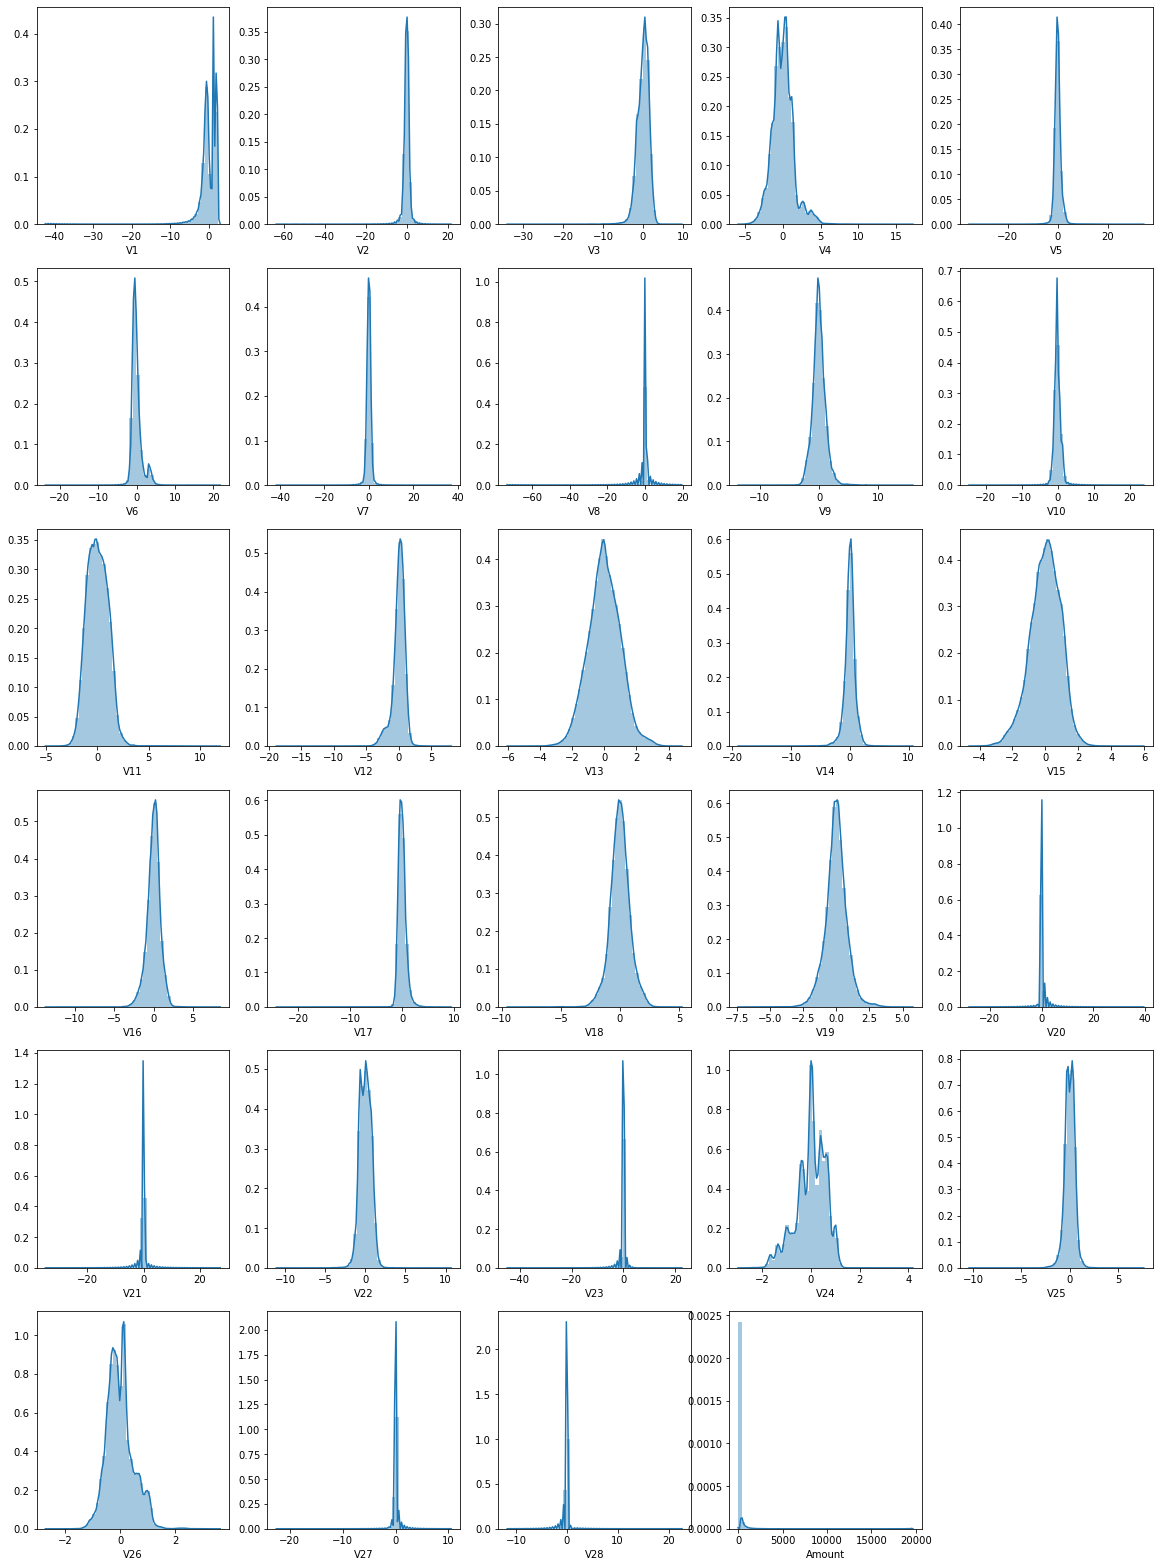

In [10]:
# plotting all the columns of the train dataset to check if the data present in any of the columns is skewed or not
temp = X_train.columns.to_list()
plt.figure(figsize = (20,28))
for i in enumerate(temp):
    plt.subplot(6,5,i[0]+1)
    sns.distplot(X_train[i[1]])

While most of the columns depict a Gaussian distribution, some of the features are skewed and some are not normalized. Hence, we will have to perform Power-Transform on the entire dataset to ensure that all the columns in the dataset follow a Gaussian distribution and are normal. Since there are negative values present in the dataset, we can use the 'yeo-johnson' method for this.

In [11]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson', standardize=True)
X_train_pt = pt.fit_transform(X_train)
X_train_pt= pd.DataFrame(X_train_pt, columns=temp)
X_train_pt.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.598470 -0.076635  0.414364  0.017924 -0.150960  0.345395 -0.423005   
1  1.445565 -0.134373 -0.902690  0.208193  0.136115 -0.409005  0.073299   
2  0.843049 -0.987411 -0.652970 -1.919788  0.423178  2.278265 -1.478071   
3 -0.326321  0.805913 -0.366669 -0.296532  0.512231 -0.805682  0.794658   
4  0.566536 -0.144094  0.637616  0.445581 -0.564414  0.053504 -0.482081   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.053042  1.152344 -0.468132  2.711653 -1.044975  2.490859  1.988839   
1 -0.252318  0.277355  0.257359  0.627815  1.546125  0.529601  0.317871   
2  0.853644 -1.629738  1.315947 -0.265160 -1.117650  0.627704 -0.502524   
3 -0.185940  0.130993 -0.479100 -0.135555  0.007221  0.121092 -1.148253   
4  0.184401  0.269297  0.107031  1.543871  0.577842 -0.847218  0.455308   

        V15       V16       V17       V18       V19       V20       V21  \
0  0.192412 -0.153792  0.752506 -0.799254 -0.752043 -0.142787 -0.217742   
1 -0.765034  0.165528 -0.886526 -0.347125  0.754667 -0.220963 -0.355324   
2  1.139137  0.141712 -0.192826  1.001148 -0.138704 -0.090662 -0.009865   
3 -0.307278  0.046717  0.670351 -0.599578 -0.610739  0.173877 -0.457294   
4  1.052225  0.485489 -0.496743 -0.071757 -0.563810 -0.222159  0.013937   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.215110  0.229615 -0.518220 -0.140181  1.711153 -0.180481 -0.027825   
1 -0.881595  0.418801 -0.841362 -0.510193  0.511993 -0.206056 -0.220886   
2  0.104342 -0.203779  1.917859  0.990486  0.014536  0.099397  0.107899   
3 -1.012077  0.252022  1.861162 -0.857357  0.288656  0.854371  0.473371   
4 -0.092414  0.225649  0.287704 -0.037162  0.529867 -0.020486  0.051746   

     Amount  
0 -1.853467  
1 -1.446662  
2  0.706491  
3 -1.576187  
4 -0.715547

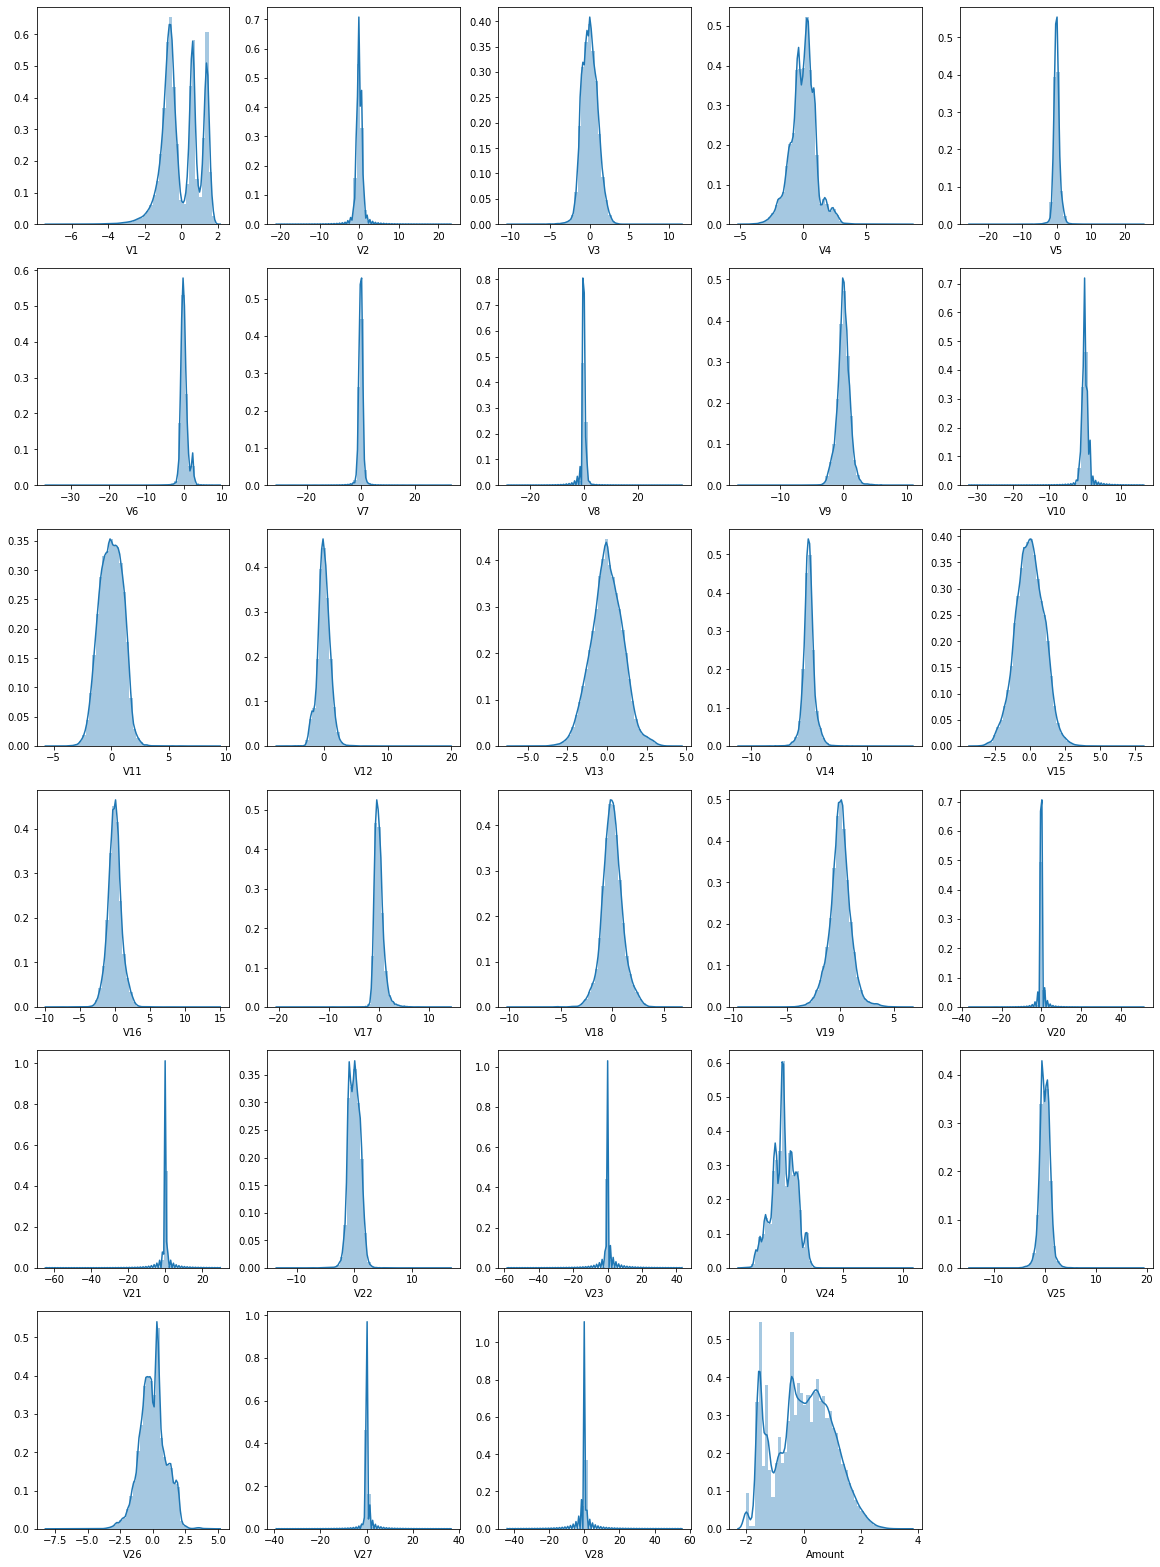

In [12]:
plt.figure(figsize = (20,28))
for i in enumerate(temp):
    plt.subplot(6,5,i[0]+1)
    sns.distplot(X_train_pt[i[1]])

Here, we can see that the columns are normal and Gaussian now.

In [13]:
# applying power-transform on the test dataset
X_test_pt = pt.transform(X_test)
X_test_pt = pd.DataFrame(X_test_pt, columns=temp)
X_test_pt.head()

V1        V2        V3        V4        V5        V6        V7  \
0  0.658689 -0.233276 -0.560895  0.369676  1.319280  2.555125 -0.741600   
1  1.407424 -0.140817 -1.748593 -0.025081  1.966521  2.175507 -0.544233   
2  0.096621 -0.938971  0.531532  0.346459 -1.053717  0.388041 -0.419957   
3  1.522070 -0.158956 -1.050062  0.196123  0.261972 -0.349599  0.084866   
4  0.113947  1.083883 -1.467842  3.067119  1.595326 -0.314158  0.875044   

         V8        V9       V10       V11       V12       V13       V14  \
0  1.063597  0.711001 -0.095232 -0.828848  0.306255 -0.253320 -0.371748   
1  0.730088  1.695301 -0.974184  1.097030 -2.004819  1.248858 -0.141118   
2  0.233140  0.958128 -0.377715  1.113745  1.044915 -1.105159 -0.139909   
3 -0.282835  0.655353  0.119447 -1.765857 -0.314866 -0.200860  0.266315   
4 -0.318009 -1.929774  0.892192 -0.241852 -1.086679  0.478501 -2.535899   

        V15       V16       V17       V18       V19       V20       V21  \
0 -0.855520 -0.314360 -0.435584 -0.014002  0.591853 -0.076324 -0.221009   
1 -0.825584 -0.067886  2.468963  0.381756 -0.547158 -0.192581 -0.241112   
2 -0.710575 -0.303358  0.345974 -0.584381  0.292725  0.566168  0.058740   
3  0.180992  0.109783 -0.718288 -0.680176  0.586084 -0.295822 -0.491068   
4  0.190638  0.348483  3.497318  1.323253  0.822159  0.322130 -0.029732   

        V22       V23       V24       V25       V26       V27       V28  \
0 -0.414727 -0.219108  1.954270  1.710725 -0.512722  0.132377  0.067132   
1 -0.143108  0.130718  0.969659  0.160017  1.254289 -0.147385 -0.123027   
2 -0.544458 -0.216084  0.412355 -0.299816  1.725113 -0.234614  0.173898   
3 -1.237037  0.352663 -1.630590 -0.397150  0.628529 -0.205181 -0.215216   
4  0.359377  0.612500  0.498160 -0.667617  0.958808  0.415974  0.026197   

     Amount  
0 -1.268556  
1 -0.630387  
2  1.506176  
3 -1.541291  
4  0.209908

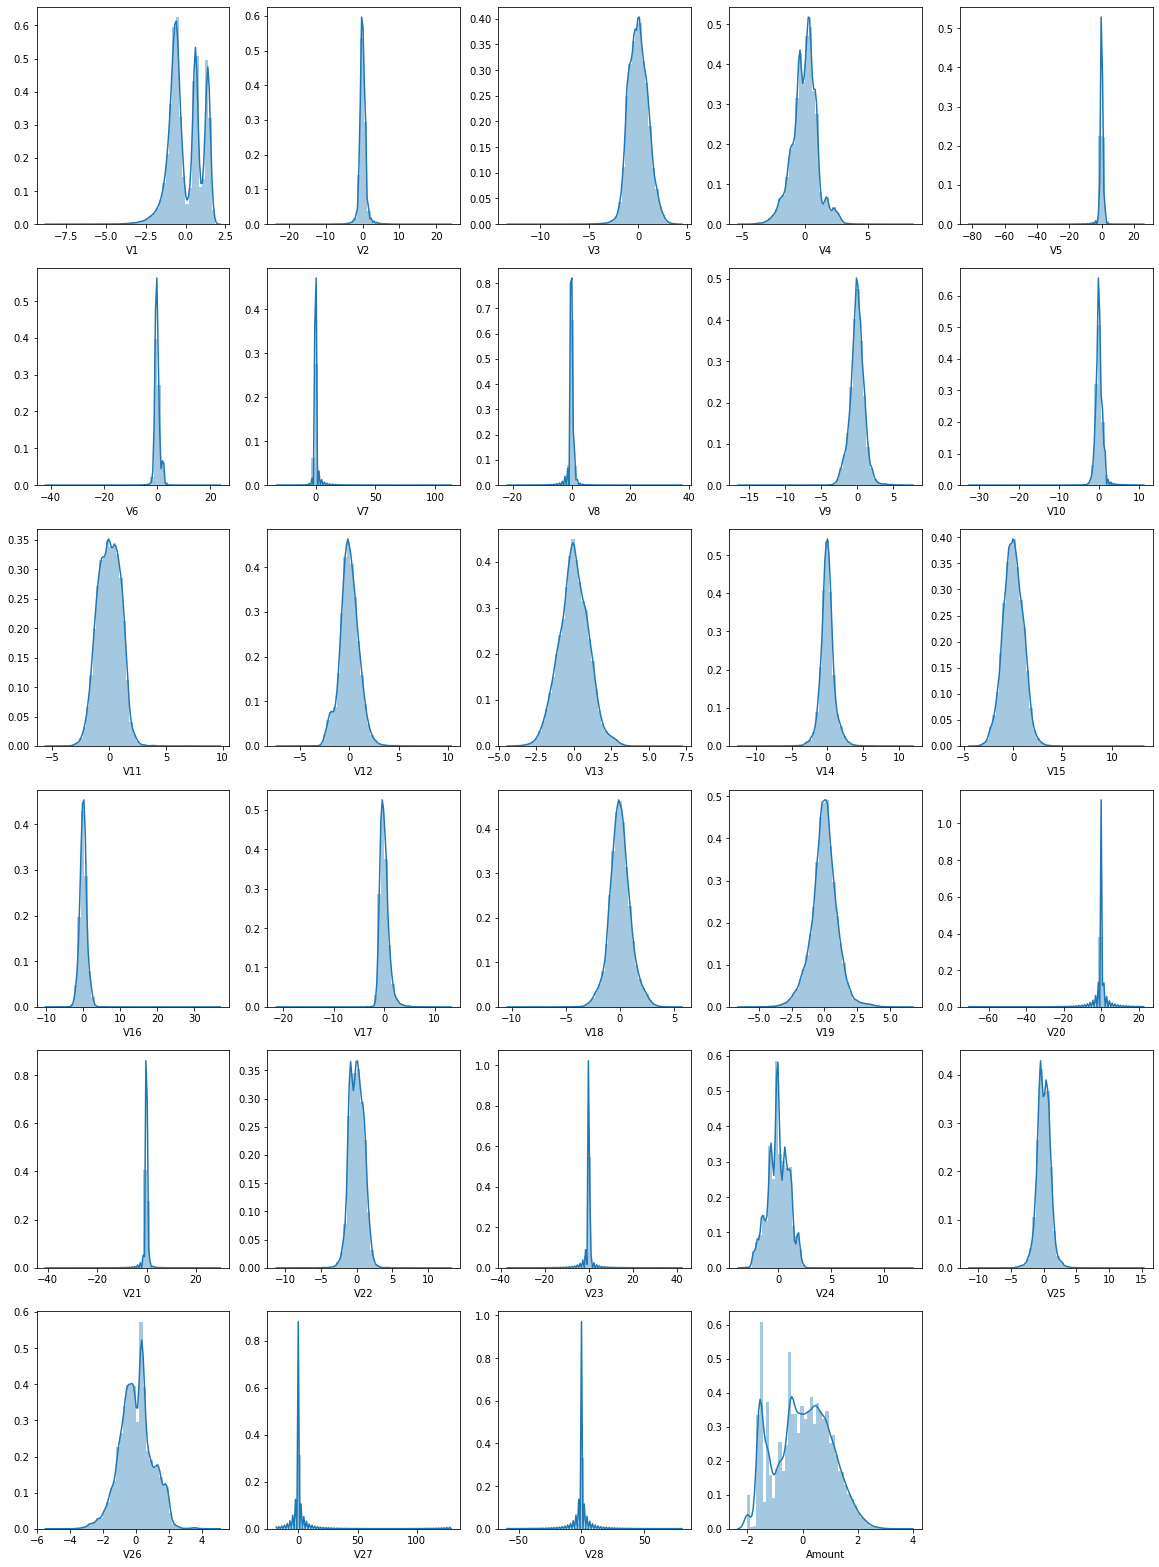

In [14]:
# visualizing the power-transformed test dataset
plt.figure(figsize = (20,28))
for i in enumerate(temp):
    plt.subplot(6,5,i[0]+1)
    sns.distplot(X_test_pt[i[1]])

## Data Modeling

### Part-1 Modeling on Imbalanced dataset

As we can see that there is huge class imbalance, we first implement all the models without rectifying the Data Imbalance problem.

#### Logistic Regression

In [15]:
# creating logistic regression model with cross validation using unbalanced data
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
log_reg = LogisticRegressionCV(max_iter=200, random_state = 1234, n_jobs = -1, solver='sag', cv = 3)

In [ ]:
log_reg.fit(X_train_pt, y_train)
log_reg_pred = log_reg.predict(X_test_pt)

##### Evaluation metrics

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

In [24]:
print("Accuracy: ", round(accuracy_score(y_test, log_reg_pred)*100,2))
print("Precision: ", round(precision_score(y_test, log_reg_pred)*100,2))
print("Recall: ", round(recall_score(y_test, log_reg_pred)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, log_reg_pred)*100,2))

Accuracy:  99.92
Precision:  81.58
Recall:  65.49
ROC AUC:  82.73


Logistic Regression on Unbalanced Data:
- Accuracy:  99.92
- Precision:  81.58
- Recall:  65.49
- ROC AUC:  82.73

We can see here that even though the Accuracy of the model is extremely high, the Recall and the Area_under_ROC is much lower. So, we can conclude that isn't a very good model since it is not catching the frauds very well. This is due to the class imbalance present in the dataset.
Hence, we will have to select a model that has a high Precision, Recall and Area_under_ROC as opposed to only looking at the Accuracy.

#### Random Forest

In [17]:
# creating random forest model with cross validation using unbalanced data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

param_grid = {
    'max_depth': range(5, 100, 20),
    'min_samples_leaf': range(100, 400, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [100, 300, 500]
}
# Create a base model
rfc = RandomForestClassifier()
# Instantiate the randomized search model
rfc_CV = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, scoring = "roc_auc", return_train_score = True, cv = 3, n_jobs = -1,
                            verbose = 1)

In [61]:
rndm_frst = rfc_CV.fit(X_train_pt, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 21.4min finished


In [62]:
best_max_depth = rndm_frst.best_params_["max_depth"]
best_min_samples_leaf = rndm_frst.best_params_["min_samples_leaf"]
best_min_samples_split = rndm_frst.best_params_["min_samples_split"]
best_n_estimators = rndm_frst.best_params_["n_estimators"]

In [63]:
#creating model with best parameters
rfc_model = RandomForestClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                                   n_estimators = best_n_estimators)
rfc_model_fit = rfc_model.fit(X_train_pt, y_train)
rfc_pred = rfc_model_fit.predict(X_test_pt)

In [64]:
print("Accuracy: ", round(accuracy_score(y_test, rfc_pred)*100,2))
print("Precision: ", round(precision_score(y_test, rfc_pred)*100,2))
print("Recall: ", round(recall_score(y_test, rfc_pred)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, rfc_pred)*100,2))

Accuracy:  99.83
Precision:  0.0
Recall:  0.0
ROC AUC:  50.0


Random Forest on Unbalanced Data:
- Accuracy:  99.83
- Precision:  0.0
- Recall:  0.0
- ROC AUC: 50.0

#### XGBoost

In [19]:
# creating XGBoost model with cross validation using unbalanced data
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=1234)
xgb_CV = RandomizedSearchCV(estimator = xgb, param_distributions = param_grid, scoring = "roc_auc", return_train_score = True, cv = 3, n_jobs = -1,
                            verbose = 1)

In [67]:
xgb_CV.fit(X_train_pt, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.5min finished


[12:13:13] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=1234, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [68]:
best_max_depth = xgb_CV.best_params_["max_depth"]
best_min_samples_leaf = xgb_CV.best_params_["min_samples_leaf"]
best_min_samples_split = xgb_CV.best_params_["min_samples_split"]
best_n_estimators = xgb_CV.best_params_["n_estimators"]

In [69]:
#creating model with best parameters
xgb_model = XGBClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                          n_estimators = best_n_estimators)
xgb_model_fit = xgb_model.fit(X_train_pt, y_train)
xgb_pred = xgb_model_fit.predict(X_test_pt)

[12:13:58] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [70]:
print("Accuracy: ", round(accuracy_score(y_test, xgb_pred)*100,2))
print("Precision: ", round(precision_score(y_test, xgb_pred)*100,2))
print("Recall: ", round(recall_score(y_test, xgb_pred)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, xgb_pred)*100,2))

Accuracy:  99.95
Precision:  92.37
Recall:  76.76
ROC AUC:  88.38


XGBoost on Unbalanced Data:
- Accuracy:  99.95
- Precision:  92.37
- Recall:  76.76
- ROC AUC:  88.38

### Part-2: Modeling with balanced dataset

In this part, 3 techniques to balance the dataset are performed. THey are:
- OverSampling
- Smote
- ADASYN

### Part-2A: Data balancing using Random Oversampling

In this, RandomOverSampler is used after which DataModels are implemented on the balanced dataset

In [20]:
from imblearn.over_sampling import RandomOverSampler

RO_sampler = RandomOverSampler(sampling_strategy='minority', random_state = 1234)
X_train_RO, y_train_RO = RO_sampler.fit_resample(X_train_pt, y_train)
print([len(X_train_pt), len(y_train)])
print([len(X_train_RO), len(y_train_RO)])

[199364, 199364]
[398028, 398028]


In [21]:
print(y_train.value_counts())
print(y_train_RO.value_counts())

0    199014
1       350
Name: Class, dtype: int64
1    199014
0    199014
Name: Class, dtype: int64


The classes have been balanced using Random oversampling as both the classes have equal number of data points now.

#### Logistic Regression with Random Oversampling

In [71]:
# creating logistic regression model with cross validation using balanced data from Random Oversampling
log_reg.fit(X_train_RO, y_train_RO)
log_reg_pred_RO = log_reg.predict(X_test_pt)

In [72]:
print("Accuracy: ", round(accuracy_score(y_test, log_reg_pred_RO)*100,2))
print("Precision: ", round(precision_score(y_test, log_reg_pred_RO)*100,2))
print("Recall: ", round(recall_score(y_test, log_reg_pred_RO)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, log_reg_pred_RO)*100,2))

Accuracy:  97.89
Precision:  6.44
Recall:  86.62
ROC AUC:  92.26


Logistic Regression on Balanced Data using Random Oversampling:
- Accuracy:  97.89
- Precision:  6.44
- Recall:  86.62
- ROC AUC:  92.26

#### Random Forest with Random Oversampling

In [23]:
# creating random forest model with cross validation using balanced data from Random Oversampling
rndm_frst_RO = rfc_CV.fit(X_train_RO, y_train_RO)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 24.6min finished


In [73]:
best_max_depth = rndm_frst_RO.best_params_["max_depth"]
best_min_samples_leaf = rndm_frst_RO.best_params_["min_samples_leaf"]
best_min_samples_split = rndm_frst_RO.best_params_["min_samples_split"]
best_n_estimators = rndm_frst_RO.best_params_["n_estimators"]

In [74]:
#creating model with best parameters
rfc_model_RO = RandomForestClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                                   n_estimators = best_n_estimators)
rfc_model_fit_RO = rfc_model_RO.fit(X_train_RO, y_train_RO)
rfc_pred_RO = rfc_model_fit_RO.predict(X_test_pt)

In [75]:
print("Accuracy: ", round(accuracy_score(y_test, rfc_pred_RO)*100,2))
print("Precision: ", round(precision_score(y_test, rfc_pred_RO)*100,2))
print("Recall: ", round(recall_score(y_test, rfc_pred_RO)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, rfc_pred_RO)*100,2))

Accuracy:  99.86
Precision:  55.71
Recall:  82.39
ROC AUC:  91.14


Random Forest on Balanced Data using Random Oversampling:
- Accuracy:  99.86
- Precision:  55.71
- Recall:  82.39
- ROC AUC:  91.14

#### XGBoost with Random Oversampling

In [27]:
# creating xgboost model with cross validation using balanced data from Random Oversampling
xgb_CV.fit(X_train_RO, y_train_RO)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 23.5min finished


[08:57:17] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=1234, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [76]:
best_max_depth = xgb_CV.best_params_["max_depth"]
best_min_samples_leaf = xgb_CV.best_params_["min_samples_leaf"]
best_min_samples_split = xgb_CV.best_params_["min_samples_split"]
best_n_estimators = xgb_CV.best_params_["n_estimators"]

In [77]:
#creating model with best parameters
xgb_model = XGBClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                          n_estimators = best_n_estimators)
xgb_model_fit = xgb_model.fit(X_train_RO, y_train_RO)
xgb_pred_RO = xgb_model_fit.predict(X_test_pt)

[12:29:24] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [78]:
print("Accuracy: ", round(accuracy_score(y_test, xgb_pred_RO)*100,2))
print("Precision: ", round(precision_score(y_test, xgb_pred_RO)*100,2))
print("Recall: ", round(recall_score(y_test, xgb_pred_RO)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, xgb_pred_RO)*100,2))

Accuracy:  99.95
Precision:  88.89
Recall:  78.87
ROC AUC:  89.43


XGBoost on Balanced Data using Random Oversampling:
- Accuracy:  99.95
- Precision:  88.89
- Recall:  78.87
- ROC AUC:  89.43

### Part-2B: Data balancing using SMOTE

In this, smote technique, new datapoints are generated so as to balance the classes after which DataModels are implemented on the balanced dataset

In [23]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

weight= np.linspace(0.4,0.7,10)
k = np.linspace(100,1000,10,dtype=int)
model = Pipeline([
        ('smote', SMOTE()),
        ('classification', LogisticRegression())
    ])
smote_CV = GridSearchCV(estimator = model, param_grid={"smote__sampling_strategy":weight, "smote__k_neighbors":k},
                        scoring="roc_auc",  cv=3, return_train_score=True, verbose=1, n_jobs=-1)
res = smote_CV.fit(X_train_pt, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   21.4s finished


In [24]:
smote_model = SMOTE(random_state = 100, sampling_strategy = res.best_params_["smote__sampling_strategy"],
              k_neighbors = res.best_params_["smote__k_neighbors"])

In [25]:
X_train_SMOTE, y_train_SMOTE = smote_model.fit_sample(X_train_pt, y_train.ravel())

In [26]:
X_train_SMOTE = pd.DataFrame(data = X_train_SMOTE, columns = X_train_pt.columns)
y_train_SMOTE = pd.DataFrame(data = y_train_SMOTE, columns = ["Class"])

#### Logistic Regression with SMOTE

In [42]:
# creating logistic regression model with cross validation using balanced data from SMOTE
log_reg.fit(X_train_SMOTE, y_train_SMOTE)
log_reg_pred_SMOTE = log_reg.predict(X_test_pt)

In [43]:
print("Accuracy: ", round(accuracy_score(y_test, log_reg_pred_SMOTE)*100,2))
print("Precision: ", round(precision_score(y_test, log_reg_pred_SMOTE)*100,2))
print("Recall: ", round(recall_score(y_test, log_reg_pred_SMOTE)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, log_reg_pred_SMOTE)*100,2))

Accuracy:  99.5
Precision:  22.87
Recall:  85.21
ROC AUC:  92.37


Logistic Regression on Balanced Data using SMOTE:
- Accuracy:  99.5
- Precision:  22.87
- Recall:  85.21
- ROC AUC:  92.37

#### Random Forest with SMOTE

In [ ]:
# creating random forest model with cross validation using balanced data from SMOTE
rndm_frst_SMOTE = rfc_CV.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
best_max_depth = rndm_frst_SMOTE.best_params_["max_depth"]
best_min_samples_leaf = rndm_frst_SMOTE.best_params_["min_samples_leaf"]
best_min_samples_split = rndm_frst_SMOTE.best_params_["min_samples_split"]
best_n_estimators = rndm_frst_SMOTE.best_params_["n_estimators"]

In [ ]:
#creating model with best parameters
rfc_model_SMOTE = RandomForestClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                                   n_estimators = best_n_estimators)
rfc_model_fit_SMOTE = rfc_model_SMOTE.fit(X_train_SMOTE, y_train_SMOTE)
rfc_pred_SMOTE = rfc_model_fit_SMOTE.predict(X_test_pt)

In [ ]:
print("Accuracy: ", round(accuracy_score(y_test, rfc_pred_SMOTE)*100,2))
print("Precision: ", round(precision_score(y_test, rfc_pred_SMOTE)*100,2))
print("Recall: ", round(recall_score(y_test, rfc_pred_SMOTE)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, rfc_pred_SMOTE)*100,2))

Random Forest on Balanced Data using SMOTE:
- Accuracy: 99.74
- Precision: 37.22
- Recall: 83.1
- ROC AUC: 91.43

#### XGBoost with SMOTE

In [27]:
# creating xgboost model with cross validation using balanced data from SMOTE
xgb_CV.fit(X_train_SMOTE, y_train_SMOTE)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 25.7min finished


[14:16:42] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=1234, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [28]:
best_max_depth = xgb_CV.best_params_["max_depth"]
best_min_samples_leaf = xgb_CV.best_params_["min_samples_leaf"]
best_min_samples_split = xgb_CV.best_params_["min_samples_split"]
best_n_estimators = xgb_CV.best_params_["n_estimators"]

In [29]:
#creating model with best parameters
xgb_model = XGBClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                          n_estimators = best_n_estimators)
xgb_model_fit = xgb_model.fit(X_train_SMOTE, y_train_SMOTE)
xgb_pred_SMOTE = xgb_model_fit.predict(X_test_pt)

[14:18:13] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [30]:
print("Accuracy: ", round(accuracy_score(y_test, xgb_pred_SMOTE)*100,2))
print("Precision: ", round(precision_score(y_test, xgb_pred_SMOTE)*100,2))
print("Recall: ", round(recall_score(y_test, xgb_pred_SMOTE)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, xgb_pred_SMOTE)*100,2))

Accuracy:  99.94
Precision:  80.56
Recall:  81.69
ROC AUC:  90.83


XGBoost on Balanced Data using SMOTE:
- Accuracy:  99.94
- Precision:  80.56
- Recall:  81.69
- ROC AUC:  90.83

### Part-2C: Data balancing using ADASYN

In this, ADASYN technique, synthetic data is created so as to balance the classes after which DataModels are implemented on the balanced dataset

In [38]:
from collections import Counter
print('Original target variable ditribution: ', Counter(y_train))

Original target variable ditribution:  Counter({0: 199014, 1: 350})


In [39]:
from imblearn.over_sampling import ADASYN

ada = ADASYN(sampling_strategy='minority', random_state=420, n_neighbors=5)

X_res, Y_res = ada.fit_resample(X_train_pt, y_train)

print('Oversampled target variable ditribution: ', Counter(Y_res))

Oversampled target variable ditribution:  Counter({0: 199014, 1: 199004})


#### Logistic Regression with ADASYN

In [33]:
# creating logistic regression model with cross validation using balanced data from ADASYN
log_reg.fit(X_res, Y_res)
log_reg_pred_ada = log_reg.predict(X_test_pt)

In [34]:
print("Accuracy: ", round(accuracy_score(y_test, log_reg_pred_ada)*100,2))
print("Precision: ", round(precision_score(y_test, log_reg_pred_ada)*100,2))
print("Recall: ", round(recall_score(y_test, log_reg_pred_ada)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, log_reg_pred_ada)*100,2))

Accuracy:  91.11
Precision:  1.74
Recall:  94.37
ROC AUC:  92.74


Logistic Regression on Balanced Data using ADASYN:
- Accuracy:  91.11
- Precision:  1.74
- Recall:  94.37
- ROC AUC:  92.74

#### Random Forest with ADASYN

In [37]:
# creating random forest model with cross validation using balanced data from ADASYN
rndm_frst_ada = rfc_CV.fit(X_res, Y_res)

best_max_depth = rndm_frst_ada.best_params_["max_depth"]
best_min_samples_leaf = rndm_frst_ada.best_params_["min_samples_leaf"]
best_min_samples_split = rndm_frst_ada.best_params_["min_samples_split"]
best_n_estimators = rndm_frst_ada.best_params_["n_estimators"]

#creating model with best parameters
rfc_model_ada = RandomForestClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                                   n_estimators = best_n_estimators)
rfc_model_fit_ada = rfc_model_ada.fit(X_res, Y_res)
rfc_pred_ada = rfc_model_fit_ada.predict(X_test_pt)

print("Accuracy: ", round(accuracy_score(y_test, rfc_pred_ada)*100,2))
print("Precision: ", round(precision_score(y_test, rfc_pred_ada)*100,2))
print("Recall: ", round(recall_score(y_test, rfc_pred_ada)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, rfc_pred_ada)*100,2))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 83.4min finished


Accuracy:  99.72
Precision:  34.83
Recall:  81.69
ROC AUC:  90.72


Random Forest on Balanced Data using ADASYN:
- Accuracy:  99.72
- Precision:  34.83
- Recall:  81.69
- ROC AUC:  90.72

#### XGBoost with ADASYN

In [35]:
# creating XGBoost model with cross validation using balanced data from SMOTE
xgb_CV.fit(X_res, Y_res)

best_max_depth = xgb_CV.best_params_["max_depth"]
best_min_samples_leaf = xgb_CV.best_params_["min_samples_leaf"]
best_min_samples_split = xgb_CV.best_params_["min_samples_split"]
best_n_estimators = xgb_CV.best_params_["n_estimators"]

#creating model with best parameters
xgb_model = XGBClassifier(max_depth = best_max_depth, min_samples_leaf = best_min_samples_leaf, min_samples_split = best_min_samples_split,
                          n_estimators = best_n_estimators)
xgb_model_fit = xgb_model.fit(X_res, Y_res)
xgb_pred_ada = xgb_model_fit.predict(X_test_pt)

print("Accuracy: ", round(accuracy_score(y_test, xgb_pred_ada)*100,2))
print("Precision: ", round(precision_score(y_test, xgb_pred_ada)*100,2))
print("Recall: ", round(recall_score(y_test, xgb_pred_ada)*100,2))
print("ROC AUC: ", round(roc_auc_score(y_test, xgb_pred_ada)*100,2))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 35.1min finished


[15:05:43] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:07:46] WARNING: ../src/learner.cc:516: 
Parameters: { min_samples_leaf, min_samples_split } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Accuracy:  99.92
Precision:  74.36
Recall:  81.69
ROC AUC:  90.82


XGBoost on Balanced Data using ADASYN:
- Accuracy:  99.92
- Precision:  74.36
- Recall:  81.69
- ROC AUC:  90.82

## Recommendations

#### Unbalanced Data Models

###### Logistic Regression:
- Accuracy: 99.92
- Precision: 81.58
- Recall: 65.49
- ROC AUC: 82.73

###### Random Forest:
- Accuracy:  99.83
- Precision:  0.0
- Recall:  0.0
- ROC AUC: 50.0

###### XGBoost:
- Accuracy:  99.95
- Precision:  92.37
- Recall:  76.76
- ROC AUC:  88.38

### Balanced Data Models
 
##### Random Oversampling
###### Logistic Regression:
- Accuracy:  97.89
- Precision:  6.44
- Recall:  86.62
- ROC AUC:  92.26

###### Random Forest:
- Accuracy:  99.86
- Precision:  55.71
- Recall:  82.39
- ROC AUC:  91.14

###### XGBoost:
- Accuracy:  99.95
- Precision:  88.89
- Recall:  78.87
- ROC AUC:  89.43

##### SMOTE
###### Logistic Regression:
- Accuracy:  99.5
- Precision:  22.87
- Recall:  85.21
- ROC AUC:  92.37

###### Random Forest:
- Accuracy: 99.74
- Precision: 37.22
- Recall: 83.1
- ROC AUC: 91.43

###### XGBoost:
- Accuracy:  99.94
- Precision:  80.56
- Recall:  81.69
- ROC AUC:  90.83

##### ADASYN
###### Logistic Regression:
- Accuracy: 91.11
- Precision: 1.74
- Recall: 94.37
- ROC AUC: 92.74

###### Random Forest:
- Accuracy:  99.72
- Precision:  34.83
- Recall:  81.69
- ROC AUC:  90.72

###### XGBoost:
- Accuracy:  99.92
- Precision:  74.36
- Recall:  81.69
- ROC AUC:  90.82

Based on the Area_under_ROC, Recall, and Precision, we can see that the XGBoost models seem to be performing the best in all the 4 balancing scenarios. Compared to Logistic Regression and Random Forest models, the Area_under_ROC of XGBoost models is generally higher along with more comparable and high values of both Precision and Recall. Additionally, the Accuracy for the XGBoost models is also greater than the Logistic Regression and Random Forest models.

Out of the three oversampling techniques used in this analysis, the XGBoost has return the best results for SMOTE with a high Area_under_ROC, Recall, and Precision along with a good Precision-Recall tradeoff. The evaluation metrics for XGBoost with SMOTE are:
- Accuracy:  99.94
- Precision:  80.56
- Recall:  81.69
- ROC AUC:  90.83